# CSCI 390: Machine Learning

File name: Turauth_HW2.ipynb

The purpose of this file is to explore the application of multilayer  perceptron models to a pair of datasets.

## Part 1

In [ ]:
# Mount Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


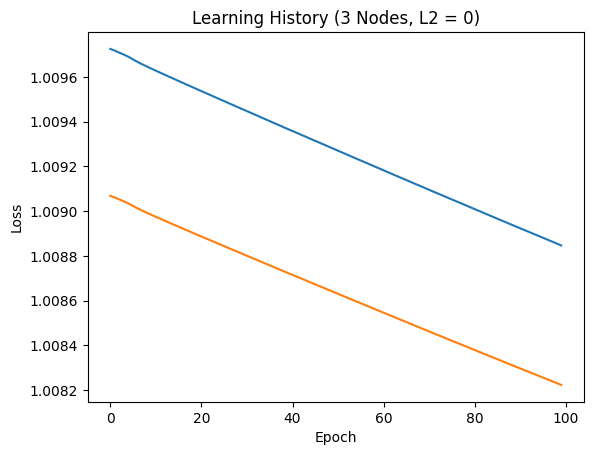

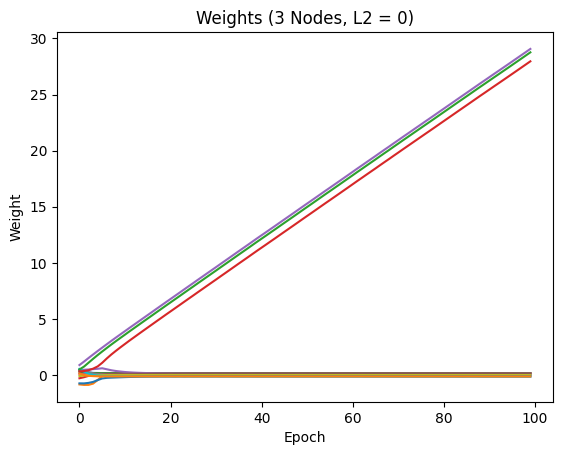

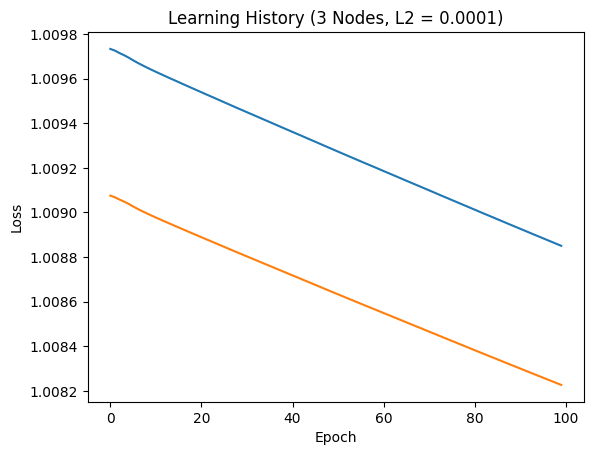

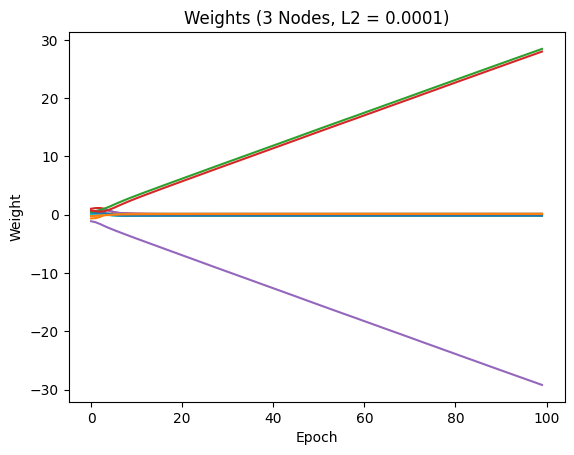

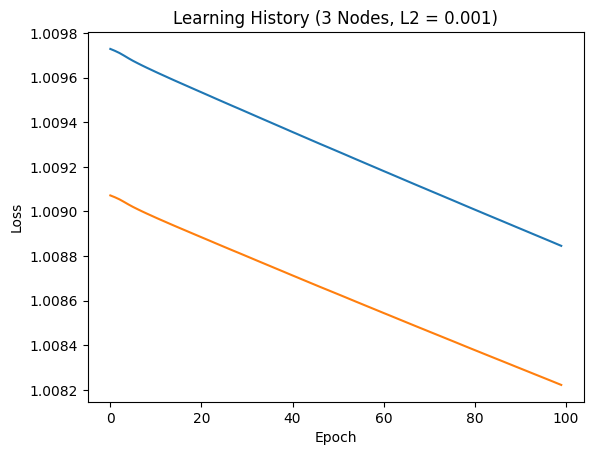

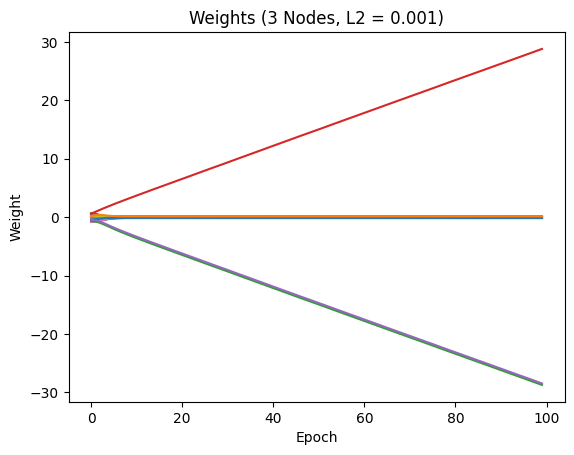

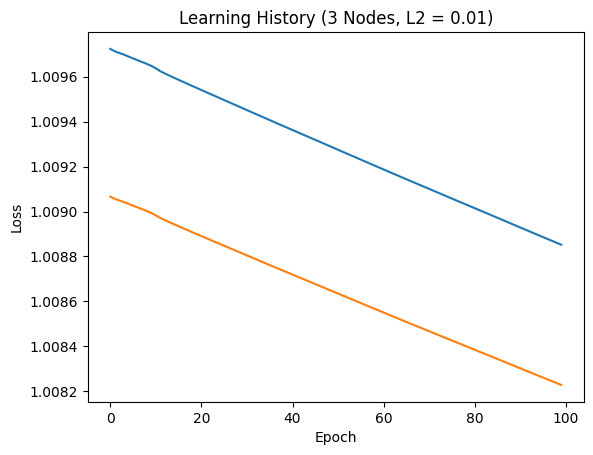

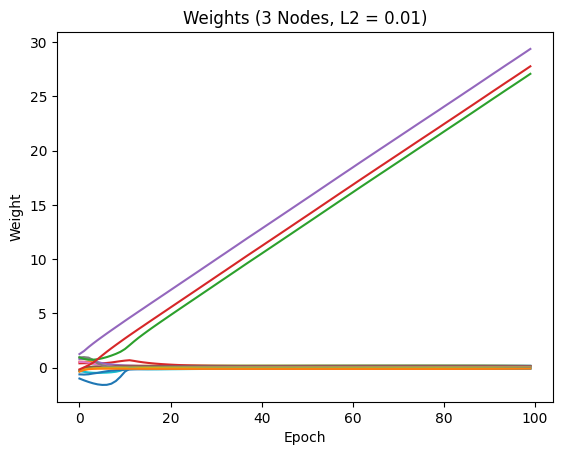

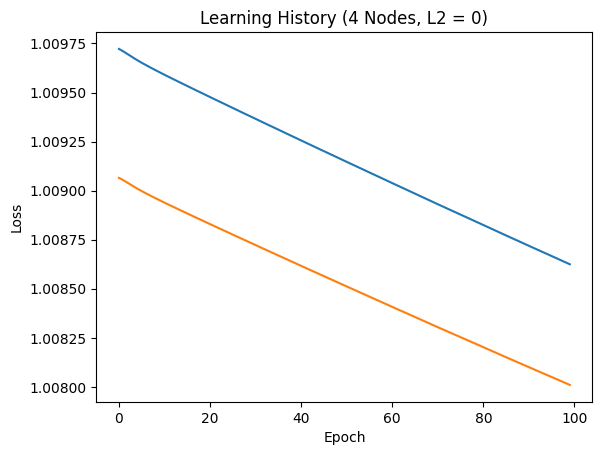

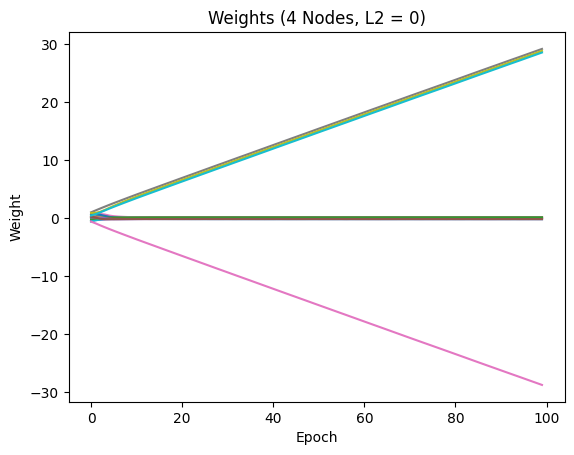

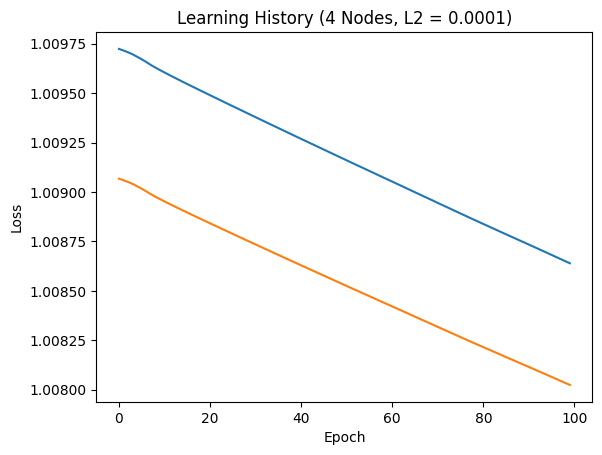

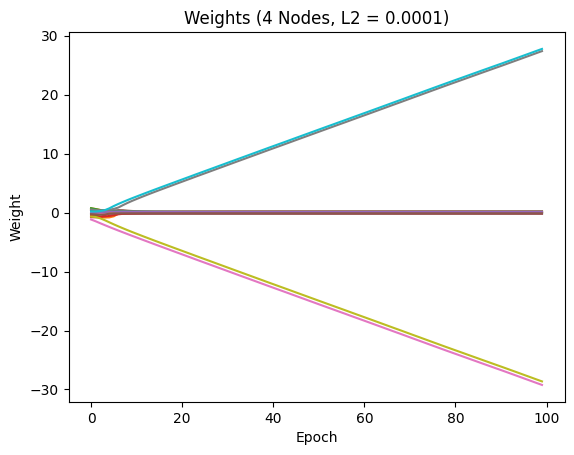

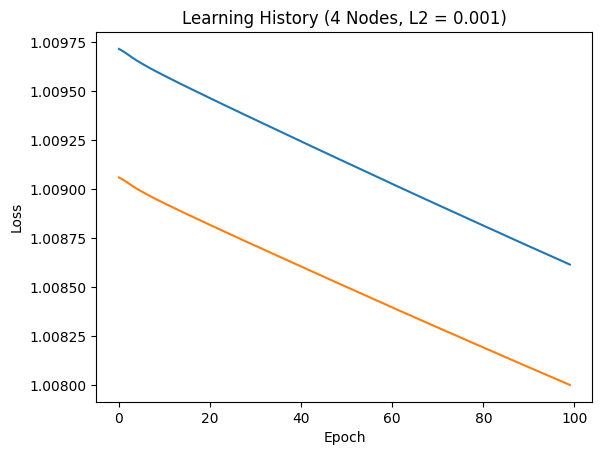

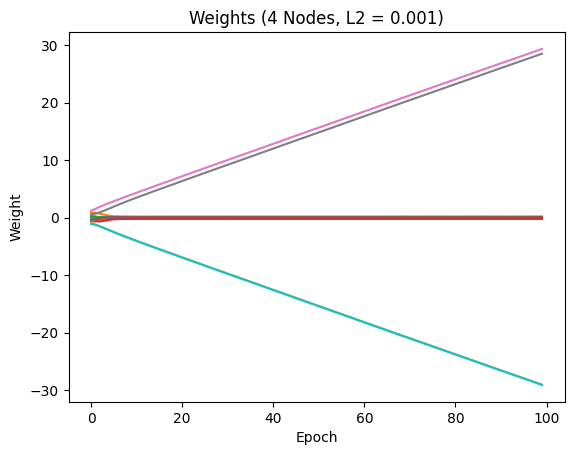

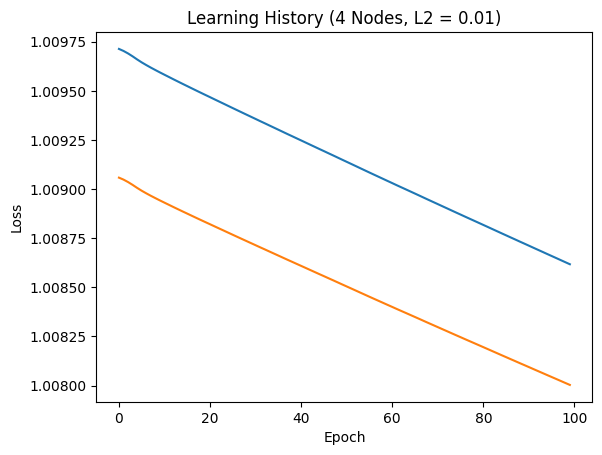

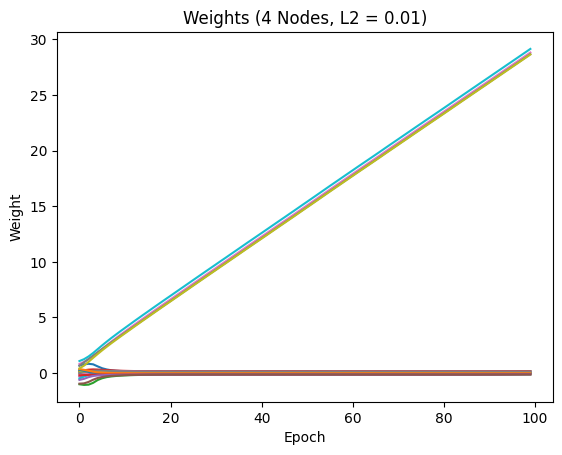

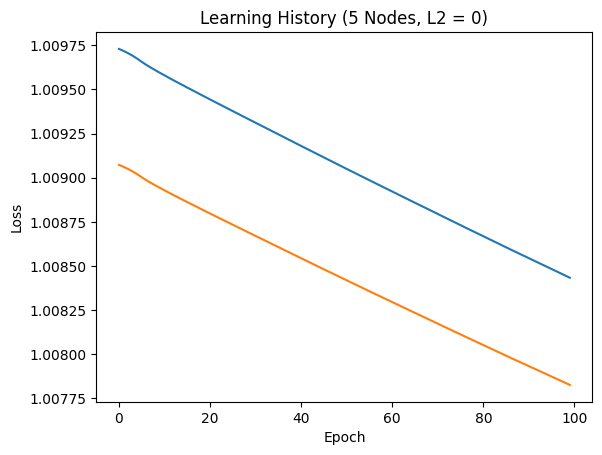

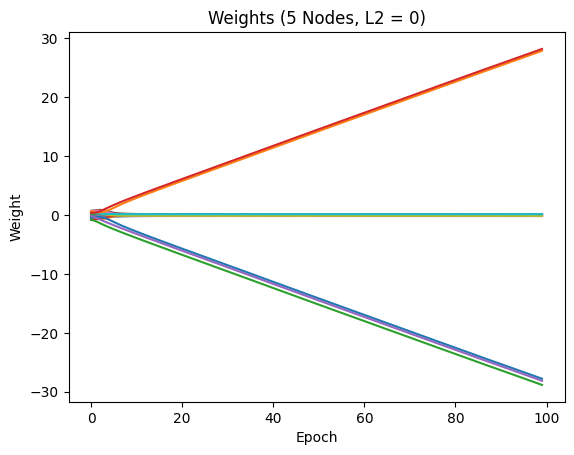

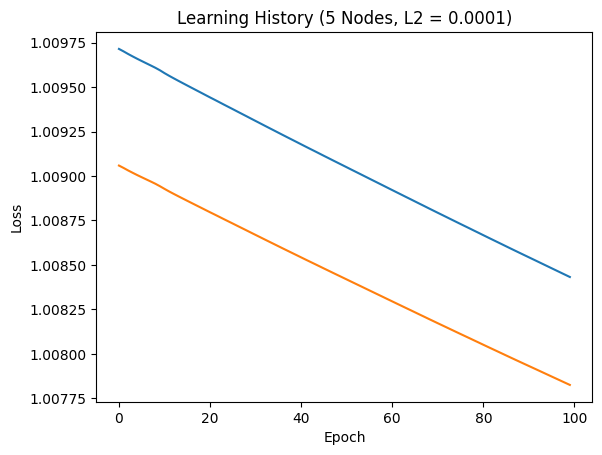

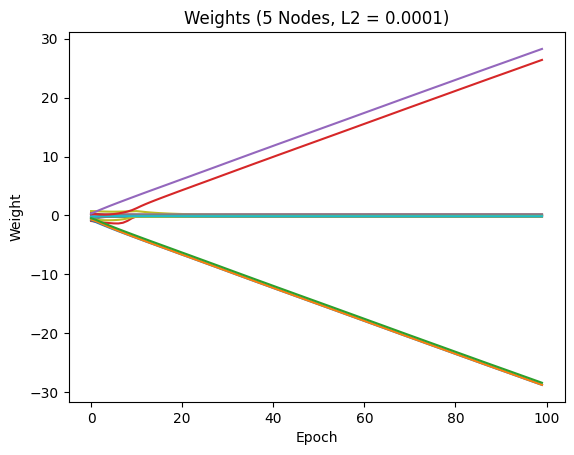

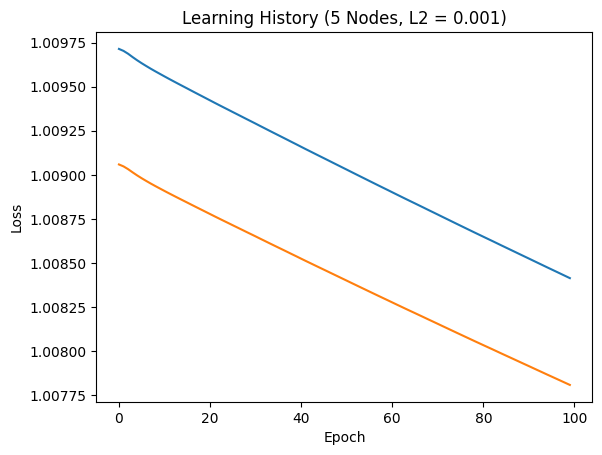

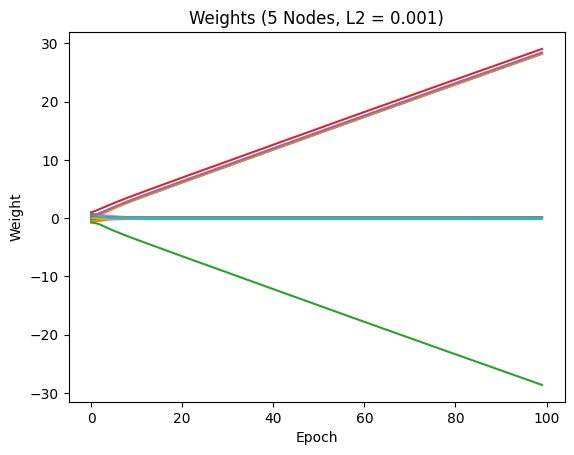

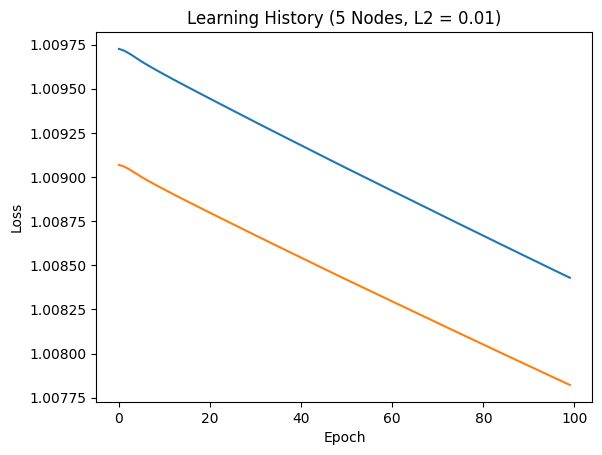

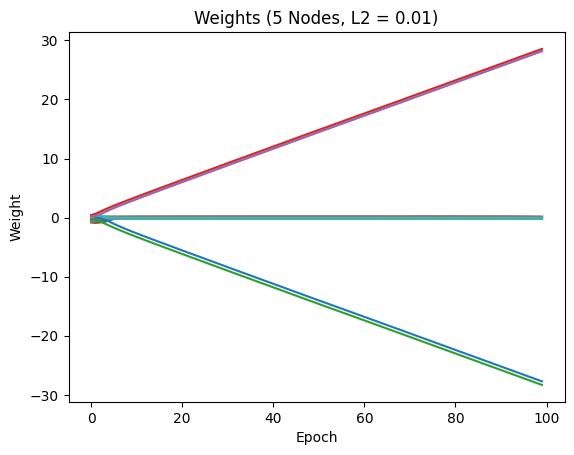

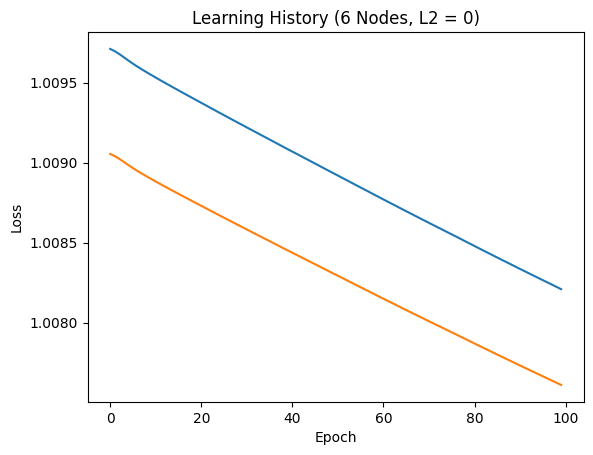

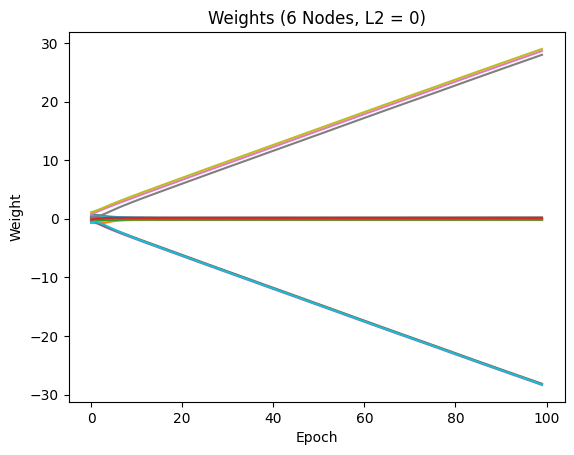

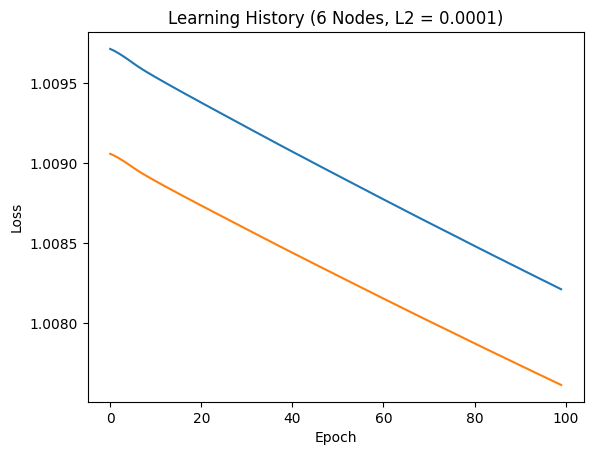

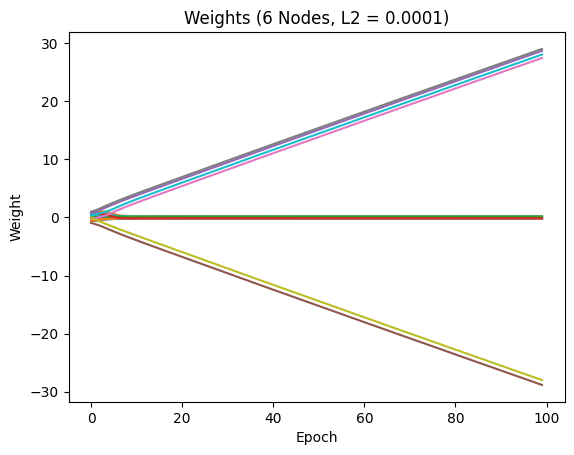

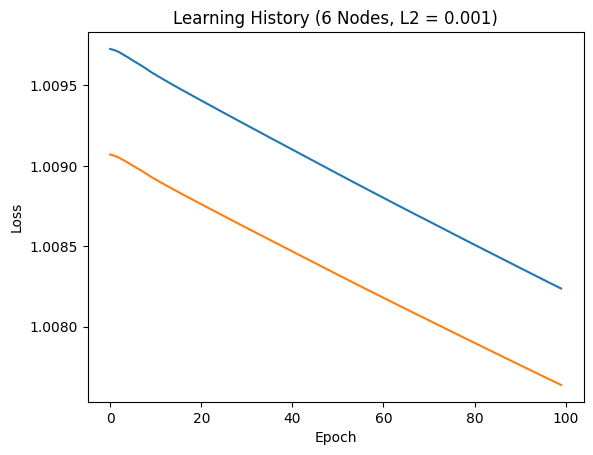

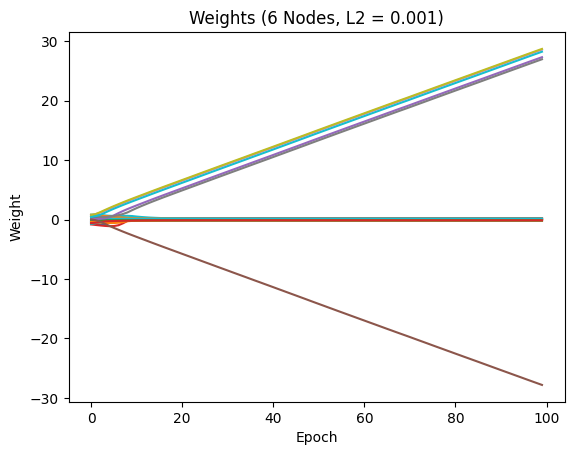

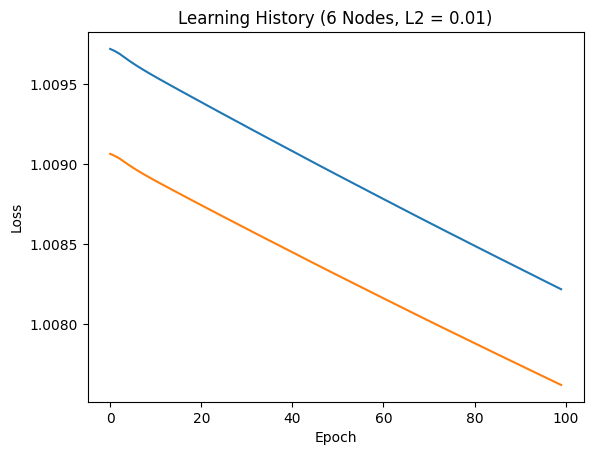

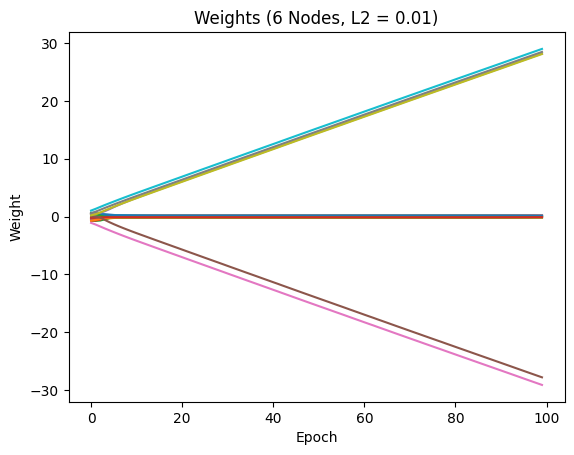

----------  ------  ------------
# of Nodes  L2      MSE
3           0       623746595.08
3           0.0001  623749064.91
3           0.001   623746245.88
3           0.01    623749993.05
4           0       623614781.89
4           0.0001  623623721.1
4           0.001   623609730.39
4           0.01    623610337.8
5           0       623500861.67
5           0.0001  623500152.85
5           0.001   623489137.73
5           0.01    623498850.9
6           0       623368332.37
6           0.0001  623370392.42
6           0.001   623384770.91
6           0.01    623373268.01
----------  ------  ------------


In [ ]:
# Import libraries.
import sklearn.model_selection as model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import pandas as pd
import numpy as np
# From https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Show the file where to find the census data.
pathName = "/content/drive/MyDrive/Colab Notebooks/HW2/"

# Read the data.
columnsToRead = ["AGI", "A_AGE", "A_SEX", "WKSWORK", "HDIVVAL"]
dataFrame = pd.read_excel(pathName + 'Census_Supplement.xlsx', sheet_name='Data', usecols=columnsToRead)

X = dataFrame.drop(["HDIVVAL"], axis=1)
y = dataFrame.HDIVVAL

# Partition the data into training and testing data.
X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=.3, random_state=0)

# Scale the independent features (https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html):
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Imputation is not needed because there are no missing values in the dataset.

data = [['# of Nodes', 'L2', 'MSE']]

# Train and plot the model with a given number of nodes and an L2 value.
def TrainAndPlot(nodes, L2):

  ann = MLPRegressor(hidden_layer_sizes=(nodes), solver='adam', activation='tanh', max_iter=100, alpha=L2)

  # Collect the learning history on the training and test data.
  trainingLoss = []
  testLoss = []
  weights = []
  epochs = []
  for epoch in range(100):
    ann.partial_fit(X_train, y_train)

    # From teacher's code:
    trainingLoss.append(1 - ann.score(X_train, y_train))
    testLoss.append(1 - ann.score(X_test, y_test))

    # Save weight matrices; code from Dr. Jones on Piazza.
    weights2 = [wt for wtvec in ann.coefs_ for wtarr in wtvec for wt in wtarr]
    if (epoch == 0):
      weights = np.asarray(weights2).flatten().reshape(-1,1)
    elif (epoch < 100):
      weights = np.concatenate((weights, np.asarray(weights2).flatten().reshape(-1,1)), axis=1)

  # Calculate the mean squared error for the current setting and add it to the table that will be outputted.
  ytrue = y_test
  ypred = ann.predict(X_test)
  mse = round(mean_squared_error(ytrue, ypred),2)
  data.append(['', '', mse])

  # Output the data.
  if nodes == 6 and L2 == .01:
    count = 0
    for nodes in range(3,7):
      for L2 in [0, .0001, .001, .01]:
        count += 1
        data[count][0] = nodes
        data[count][1] = L2


  # Plot the loss on training and test sets versus epoch (the learning history), and plot the weights versus epoch.
  plt.title('Learning History ({} Nodes, L2 = {})'.format(nodes, L2))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.plot(trainingLoss)
  plt.plot(testLoss)
  plt.show()

  for weightArr in weights:
    plt.plot(weightArr)
  plt.title('Weights ({} Nodes, L2 = {})'.format(nodes, L2))
  plt.ylabel('Weight')
  plt.xlabel('Epoch')
  plt.show()


for nodes in range(3,7):
  for L2 in [0, .0001, .001, .01]:
    TrainAndPlot(nodes, L2)

print(tabulate(data))

When there are 3-4 nodes and L2 = .01 and when there are 2 nodes and L2 = 0, some of the weights increase linearly with epochs. The same is true of all the other settings, but the other settings also have some weights that decrease linearly as the number of epochs increases. As the number of nodes increases, the MSE decreases.

This was not really what was expected as far as the graph behavior goes. It was expected that the weight values on the graphs would become slightly closer as the L2 values increased. For some settings, some of the settings, the weight values were substantially closer, but there was no obvious pattern.

## Part 2

In [ ]:
# Import the dataset and classifier and load the data frame.
import sklearn.model_selection as model
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tabulate import tabulate

iris = load_iris()

# Partition the data into training and testing data (https://www.metriccoders.com/post/iris-flower-classification-with-mlp-classifier).
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=.3, random_state=0)

headers = ['# of Nodes', 'Activation', 'Max Iterations', 'Accuracy']
data = []
for nodes in range(3, 6):
  for act in ['logistic', 'tanh', 'relu']:
    for i in range(75, 126, 25):
      clf = MLPClassifier(hidden_layer_sizes=(nodes), solver='adam', activation=act, max_iter=i).fit(X_train, y_train)
      ytrue = y_test
      ypred = clf.predict(X_test)
      acc = round(accuracy_score(ytrue, ypred),2)
      data.append([nodes, act, i, acc])

print(tabulate(sorted(data[1:], key=lambda x:x[-1]),headers=headers))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.

  # of Nodes  Activation      Max Iterations    Accuracy
------------  ------------  ----------------  ----------
           3  logistic                   100        0.24
           3  tanh                        75        0.24
           3  relu                       100        0.24
           3  relu                       125        0.24
           4  logistic                   100        0.24
           4  logistic                   125        0.24
           4  tanh                        75        0.24
           5  relu                       100        0.24
           5  relu                       125        0.24
           5  logistic                   100        0.29
           3  relu                        75        0.36
           4  relu                        75        0.36
           5  logistic                    75        0.36
           5  logistic                   125        0.36
           4  tanh                       125        0.38
           5  relu             

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(


The maximum accuracy of the ANN was 76%, when five nodes, relu activation, and 125 iterations were used.

## Part 3

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


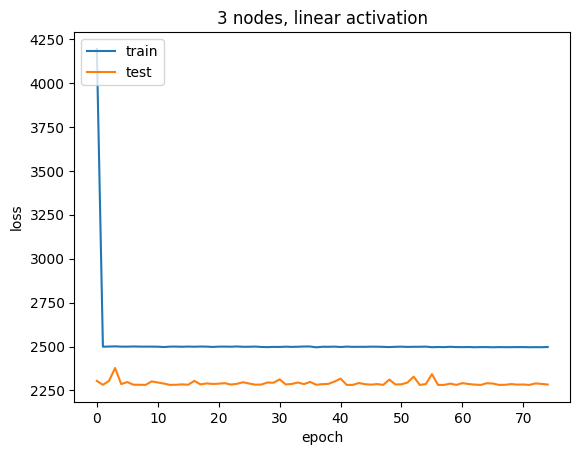

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


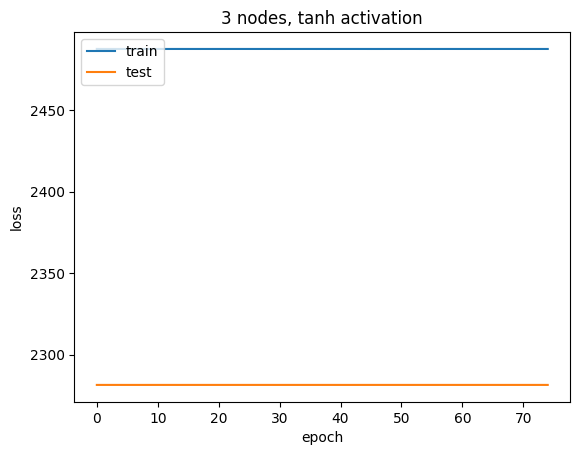

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


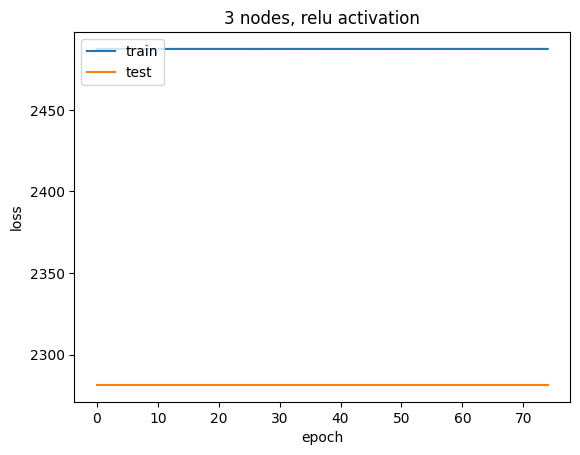

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


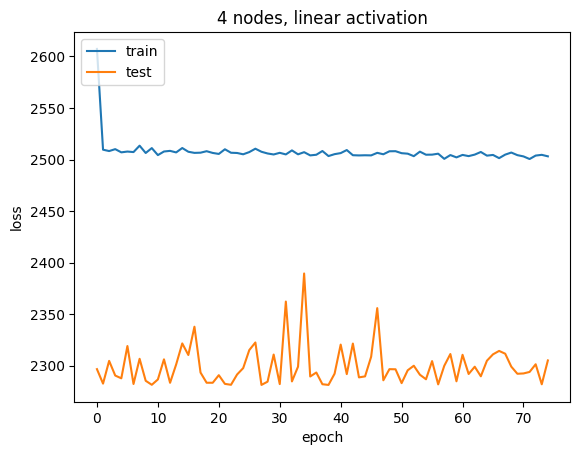

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


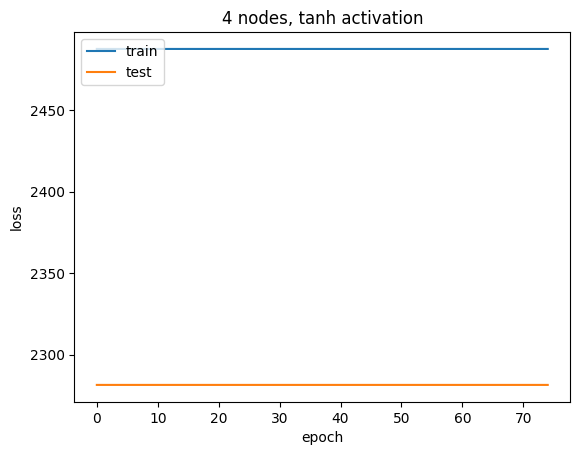

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


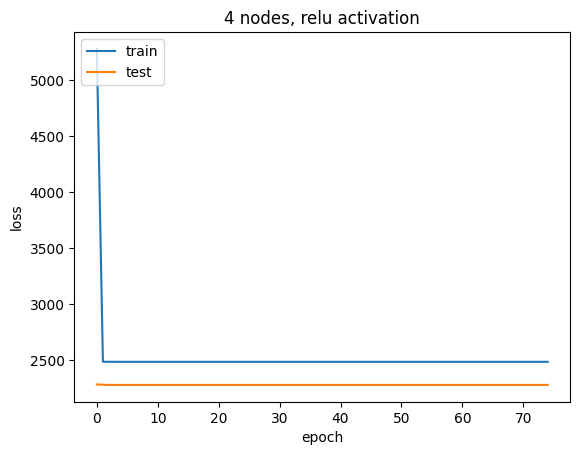

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


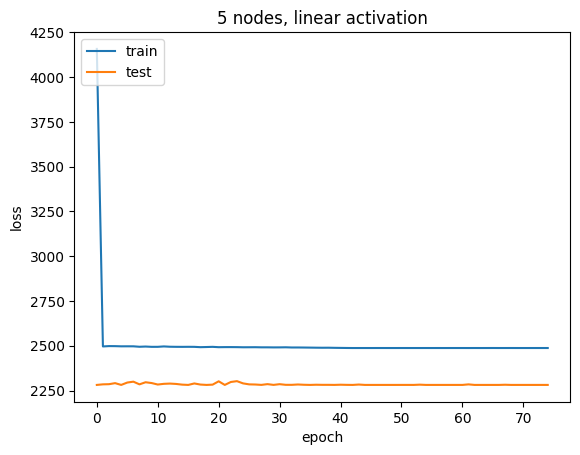

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


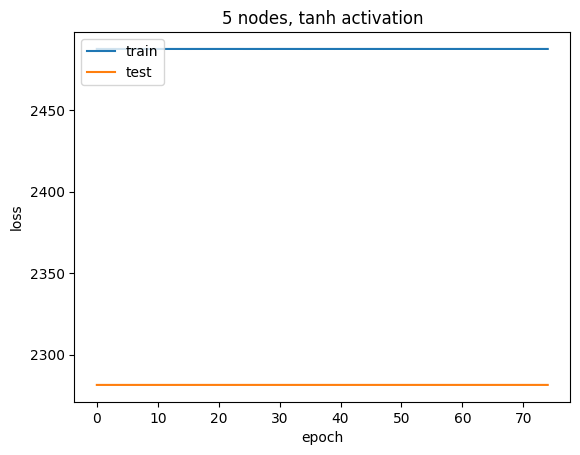

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


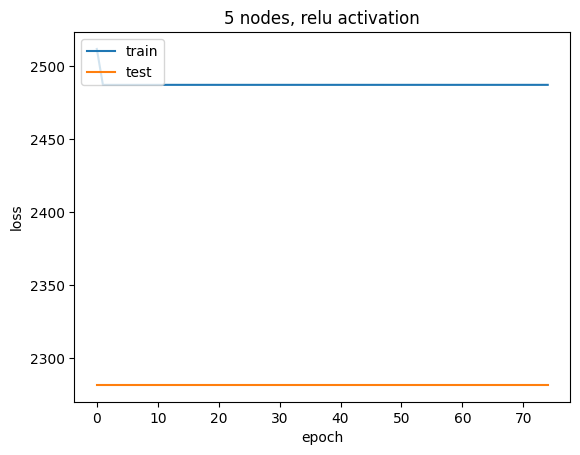

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


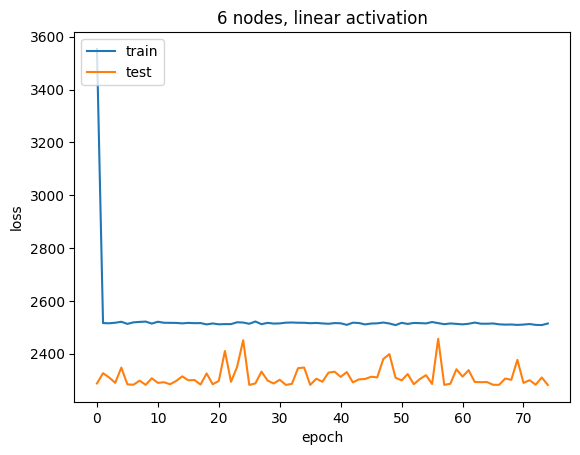

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


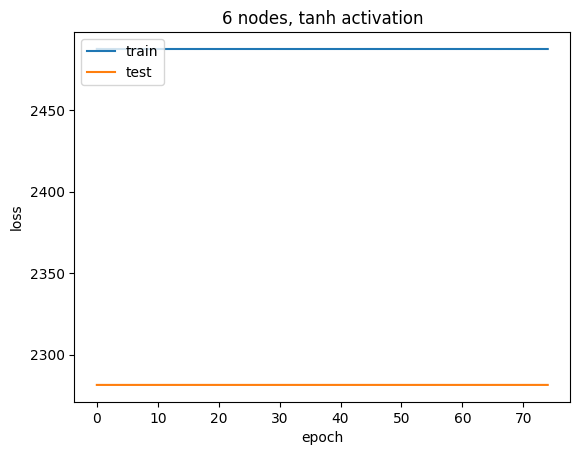

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


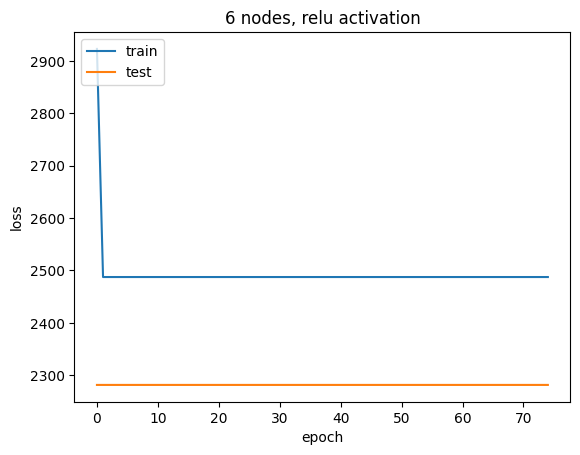

  # of Nodes  Activation            MSE
------------  ------------  -----------
           4  linear        6.21947e+08
           5  linear        6.24259e+08
           6  linear        6.24271e+08
           5  tanh          6.24272e+08
           6  tanh          6.24272e+08
           4  tanh          6.24272e+08
           3  tanh          6.24272e+08
           6  relu          6.24272e+08
           3  relu          6.24272e+08
           4  relu          6.24272e+08
           5  relu          6.24272e+08


In [ ]:
# Import libraries (https://www.tensorflow.org/tutorials/keras/regression).
import sklearn.model_selection as model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Show the file where to find the census data, read it, and partition it into training and testing data.
pathName = "/content/drive/MyDrive/Colab Notebooks/HW2/"

columnsToRead = ["AGI", "A_AGE", "A_SEX", "WKSWORK", "HDIVVAL"]
dataFrame = pd.read_excel(pathName + 'Census_Supplement.xlsx', sheet_name='Data', usecols=columnsToRead)

X = dataFrame.drop(["HDIVVAL"], axis=1)
y = dataFrame.HDIVVAL

X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=.3, random_state=0)


data2 = []

def tfTrainAndPlot(nodes, act):
  # Create the model (https://github.com/christianversloot/machine-learning-articles/blob/main/creating-an-mlp-for-regression-with-keras.md).
  inputwidth = X_train.shape[1]

  model = Sequential([
    tf.keras.layers.InputLayer(shape=(inputwidth,)),
    Dense(nodes, activation=act),
    Dense(1, activation=act)
  ])

  # Configure the model and start training (https://github.com/christianversloot/machine-learning-articles/blob/main/creating-an-mlp-for-regression-with-keras.md).
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
  history = model.fit(X_train, y_train, epochs=75, verbose=0, validation_split=0.2)

  # Add data to table.
  headers = ['# of Nodes', 'Activation', 'MSE']
  mse = mean_squared_error(y_test, model.predict(X_test))
  data2.append([nodes, act, mse])

  # Summarize history for loss (https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/).
  doPlot = True
  if (doPlot):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('{} nodes, {} activation'.format(nodes,act))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

for nodes in range(3,7):
  for act in ['linear', 'tanh', 'relu']:
    tfTrainAndPlot(nodes, act)

headers = ['# of Nodes', 'Activation', 'MSE']
print(tabulate(sorted(data2[1:], key=lambda x:x[-1]),headers=headers))

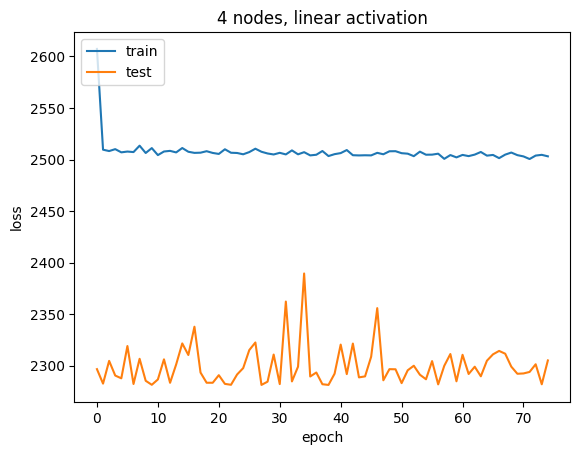

The best of the tested models is the one with 4 nodes and linear activation because it performed with the lowest error value (MSE = 6.22e+8).